In [72]:
import openai
import configparser
import requests
from IPython.display import Image

secret.ini file example
```
[openai]
api_key = sk-xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
```



In [73]:

# use configparser to read the API key from a file

config = configparser.ConfigParser()
config.read('secret.ini')
api_key = config['openai']['api_key']

openai.api_key = api_key


In [80]:
# string text over multiple lines

prompt = '''
aerial shot of a speeding car, going through open highway, with a beautiful sunset in the background
'''

In [81]:
# create image from prompt

image_response = openai.Image.create(n = 1, prompt = prompt, response_format = 'url', user = 'Mutaz Abu Ghazaleh')

In [92]:
def download_image(image_response): #image_url, image_fn):
    # Download the image from the URL
    image_url = image_response['data'][0]['url']
    image_fn = f'./img/{image_response["created"]}.png'
    response = requests.get(image_url)

    # Save the image to a file
    with open(image_fn, 'wb') as f:
        f.write(response.content)
    return image_fn

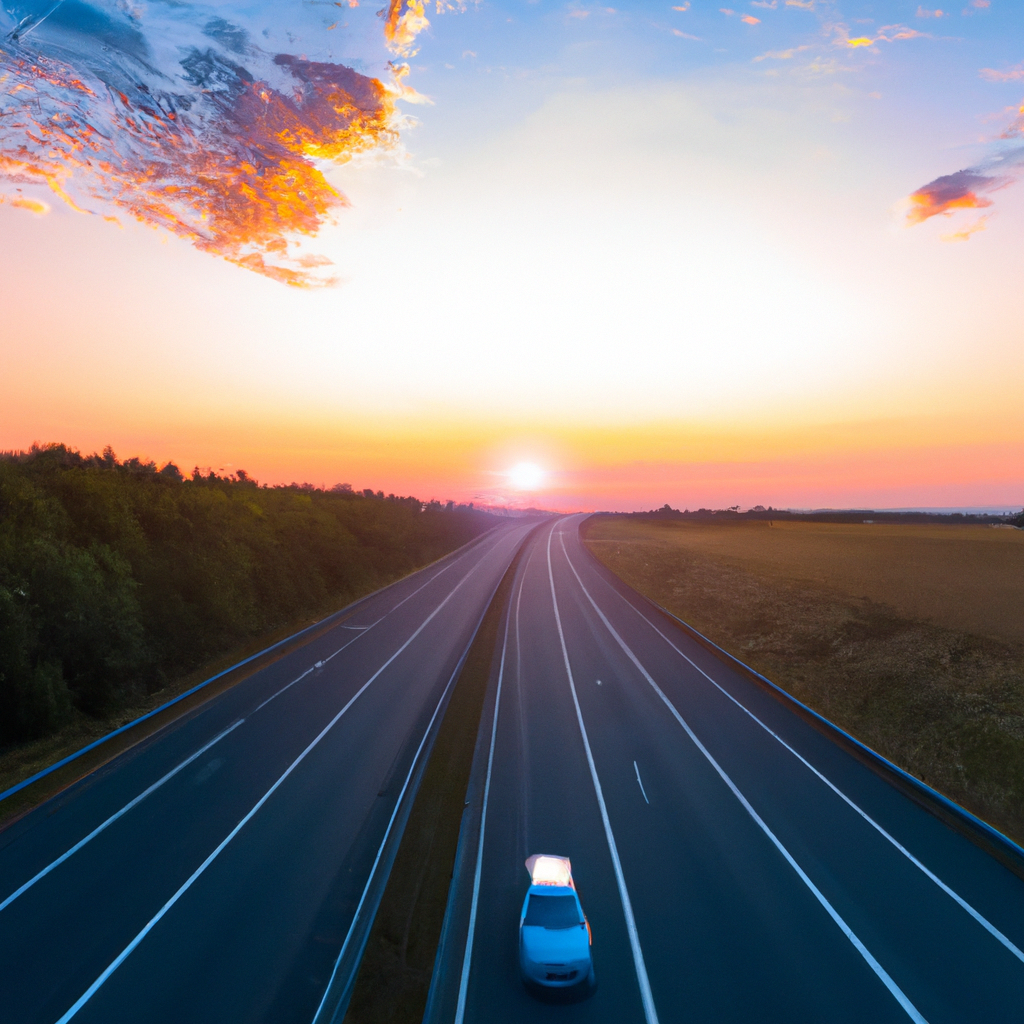

In [93]:
# display image in notebook

image_fn = download_image(image_response)
Image(image_fn)

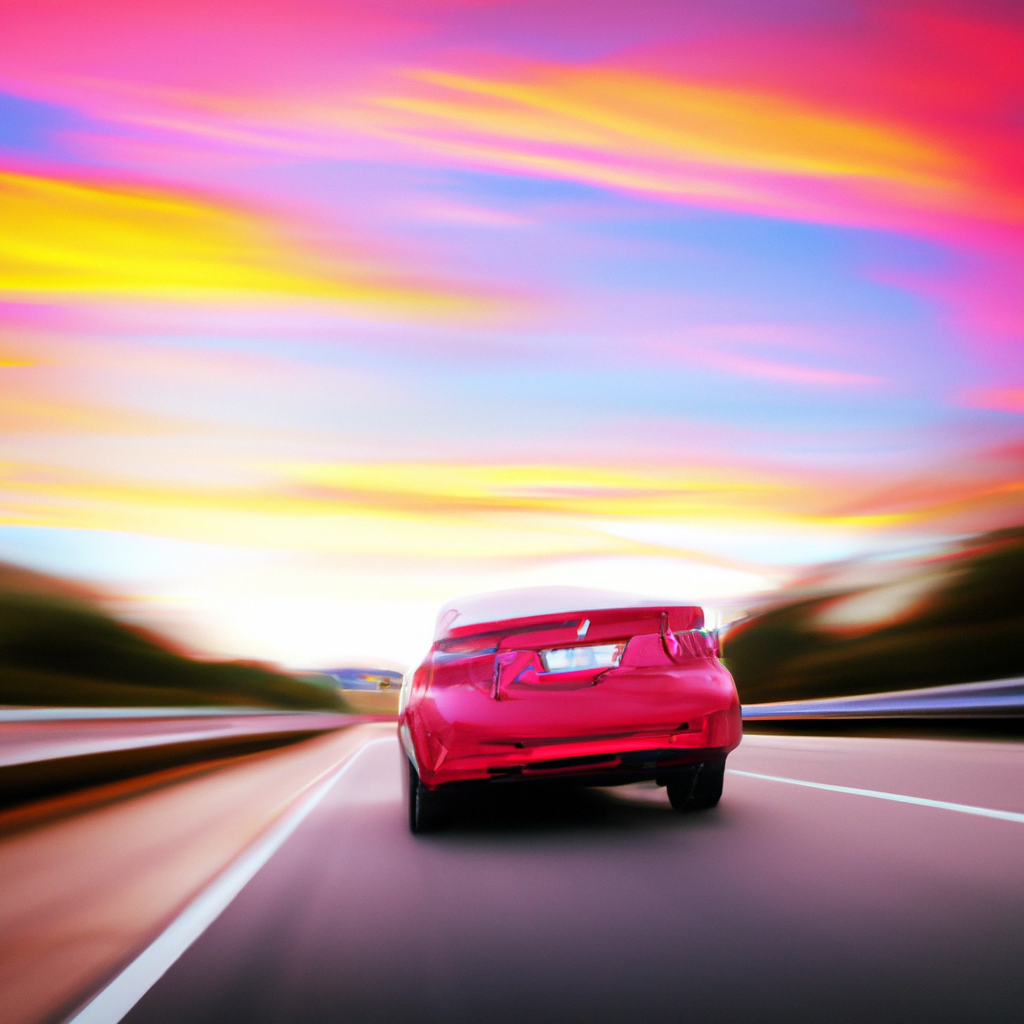

In [95]:
variation_response = openai.Image.create_variation(
  image=open('./img/first.png', "rb"),
  n=1,
  size="1024x1024", 
  
)
image_var_fn = download_image(variation_response)
Image(image_var_fn)
